<a href="https://colab.research.google.com/github/Juanchi0207/SoporteInf6to/blob/main/TpScrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Scrapping**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://fastestlaps.com/tracks/monza'

response = requests.get(url)

if not response.ok:
    raise Exception('Error fetching data')

soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', {'class': 'table table-striped fl-laptimes-trackpage'})

header_row = table.find('thead').find_all('th')
headers = [h.text.strip() for h in header_row]

data_rows = table.find('tbody').find_all('tr')
data = [[td.text.strip() for td in row.find_all('td')] for row in data_rows]

df = pd.DataFrame(data, columns=headers)

print(df)

df.to_csv('monza_gp.csv', index=False)


     Rank             Vehicle             Driver     Time PS / KG
0      1.  W11 EQ Performance     Lewis Hamilton  1:18.89   - / -
1      2.  W11 EQ Performance    Valtteri Bottas  1:18.95   - / -
2      3.       Ferrari SF71H     Kimi Raikkonen  1:19.12   - / -
3      4.       Ferrari SF71H   Sebastian Vettel  1:19.28   - / -
4      5.   Mercedes-Benz W09     Lewis Hamilton  1:19.29   - / -
..    ...                 ...                ...      ...     ...
155  156.          Haas VF-17    Kevin Magnussen  1:26.04   - / -
156  157.        Renault RS17    Nico Hulkenberg  1:26.13   - / -
157  158.        Renault RS17       Carlos Sainz  1:26.21   - / -
158  159.          Sauber C36    Pascal Wehrlein  1:26.55   - / -
159  160.       McLaren MCL32  Stoffel Vandoorne  1:26.91   - / -

[160 rows x 5 columns]


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://fastestlaps.com/tracks/monaco-post-2014'

response = requests.get(url)

if not response.ok:
    raise Exception('Error fetching data')

soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', {'class': 'table table-striped fl-laptimes-trackpage'})

header_row = table.find('thead').find_all('th')
headers = [h.text.strip() for h in header_row]

data_rows = table.find('tbody').find_all('tr')
data = [[td.text.strip() for td in row.find_all('td')] for row in data_rows]

df = pd.DataFrame(data, columns=headers)

print(df)

df.to_csv('monaco_gp.csv', index=False)


     Rank                      Vehicle             Driver     Time PS / KG
0      1.  Mercedes-Benz W10 EQ Power+     Lewis Hamilton  1:10.17   - / -
1      2.  Mercedes-Benz W10 EQ Power+    Valtteri Bottas  1:10.25   - / -
2      3.                 Ferrari SF24    Charles Leclerc  1:10.27   - / -
3      4.                 Ferrari SF21    Charles Leclerc  1:10.35   - / -
4      5.                McLaren MCL38      Oscar Piastri  1:10.42   - / -
..    ...                          ...                ...      ...     ...
158  159.                 Renault RS16      Jolyon Palmer  1:16.59   - / -
159  160.                 Renault RS17       Carlos Sainz  1:16.65   - / -
160  161.                McLaren MCL32  Stoffel Vandoorne  1:16.66   - / -
161  162.                  Manor MRT05       Rio Haryanto  1:17.29   - / -
162  163.                  Manor MRT05    Pascal Wehrlein  1:17.45   - / -

[163 rows x 5 columns]


# **Limpieza**

In [ ]:
import pandas as pd

df = pd.read_csv('monaco_gp.csv')

accent_map = {
    'á': 'a',
    'é': 'e',
    'í': 'i',
    'ó': 'o',
    'ú': 'u',
    'ä': 'a',
    'ë': 'e',
    'ï': 'i',
    'ö': 'o',
    'ü': 'u',
}

df['Driver'] = df['Driver'].apply(lambda name: ''.join([accent_map.get(c, c) for c in name]))

df.to_csv('monaco_gp_clean.csv', index=False)


In [ ]:
import pandas as pd

df = pd.read_csv('monza_gp.csv')

accent_map = {
    'á': 'a',
    'é': 'e',
    'í': 'i',
    'ó': 'o',
    'ú': 'u',
    'ä': 'a',
    'ë': 'e',
    'ï': 'i',
    'ö': 'o',
    'ü': 'u',
}

df['Driver'] = df['Driver'].apply(lambda name: ''.join([accent_map.get(c, c) for c in name]))

df.to_csv('monza_gp_clean.csv', index=False)

In [ ]:
df = pd.read_csv('monaco_gp_clean.csv')


def clean_vehicle(vehicle, escuderias):
  for key, value in escuderias.items():
    if key in vehicle:
      return value
  return vehicle

escuderias = {
    'Red Bull' : 'Red Bull',
    'Mercedes' : 'Mercedes',
    'W': 'Mercedes',
    'Ferrari' : 'Ferrari',
    'McLaren' : 'McLaren',
    'Alpine F1 Team' : 'Alpine',
    'Alpine' : 'Alpine',
    'Haas': 'Haas',
    'Aston Martin': 'Aston Martin',
    'Alfa Romeo': 'Alfa Romeo',
    'Aston Martin Aramco Cognizant F1 Team' : 'Aston Martin',
    'Alfa Romeo F1 Team ORLEN' : 'Alfa Romeo',
    'Scuderia AlphaTauri' : 'AlphaTauri',
    'Haas F1 Team' : 'Haas',
    'Williams Racing' : 'Williams',
    'Sauber': 'Sauber',
    'Toro Rosso': 'Toro Rosso',
    'Renault': 'Renault',
    'AlphaTauri': 'AlphaTauri',
    'Racing Point': 'Racing Point',
    'Manor': 'Manor',
    'RB': 'RB',
    'Force India': 'Force India'
}

df['Vehicle'] = df['Vehicle'].apply(lambda vehicle: clean_vehicle(vehicle, escuderias))
df.to_csv('monaco_gp_clean.csv', index=False)


In [ ]:
df = pd.read_csv('monza_gp_clean.csv')

def clean_vehicle(vehicle, escuderias):
  for key, value in escuderias.items():
    if key in vehicle:
      return value
  return vehicle

escuderias = {
   'Red Bull' : 'Red Bull',
    'Mercedes' : 'Mercedes',
    'W': 'Mercedes',
    'Ferrari' : 'Ferrari',
    'McLaren' : 'McLaren',
    'Alpine F1 Team' : 'Alpine',
    'Alpine' : 'Alpine',
    'Haas': 'Haas',
    'Aston Martin': 'Aston Martin',
    'Alfa Romeo': 'Alfa Romeo',
    'Aston Martin Aramco Cognizant F1 Team' : 'Aston Martin',
    'Alfa Romeo F1 Team ORLEN' : 'Alfa Romeo',
    'Scuderia AlphaTauri' : 'AlphaTauri',
    'Haas F1 Team' : 'Haas',
    'Williams Racing' : 'Williams',
    'Sauber': 'Sauber',
    'Toro Rosso': 'Toro Rosso',
    'Renault': 'Renault',
    'AlphaTauri': 'AlphaTauri',
    'Racing Point': 'Racing Point',
    'Manor': 'Manor',
    'RB': 'RB',
    'Force India': 'Force India'
}

df['Vehicle'] = df['Vehicle'].apply(lambda vehicle: clean_vehicle(vehicle, escuderias))
df.to_csv('monza_gp_clean.csv', index=False)

In [ ]:
import pandas as pd

df = pd.read_csv('monaco_gp_clean.csv')
df1 = pd.read_csv('monza_gp_clean.csv')

df.rename(columns={'Vehicle': 'Team'}, inplace=True)
df1.rename(columns={'Vehicle': 'Team'}, inplace=True)

df.to_csv('monaco_gp_clean.csv', index=False)
df1.to_csv('monza_gp_clean.csv', index=False)


# **Gráficos**

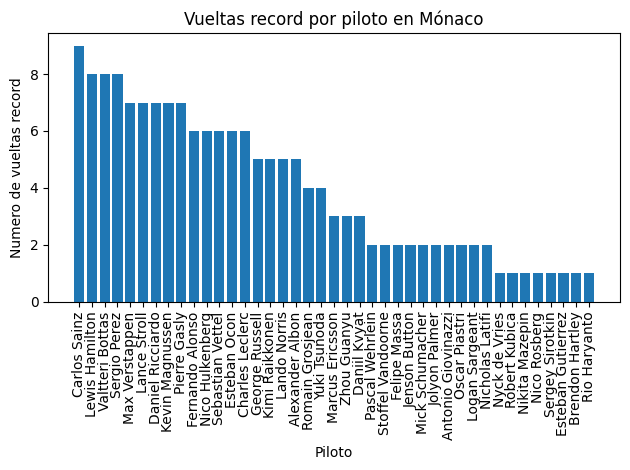

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('monaco_gp_clean.csv')

driver_record_counts = df.groupby('Driver')['Time'].count().reset_index(name='Record Count')

driver_record_counts = driver_record_counts.sort_values(by='Record Count', ascending=False)

plt.bar(driver_record_counts['Driver'], driver_record_counts['Record Count'])
plt.xlabel('Piloto')
plt.ylabel('Numero de vueltas record')
plt.title('Vueltas record por piloto en Mónaco')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


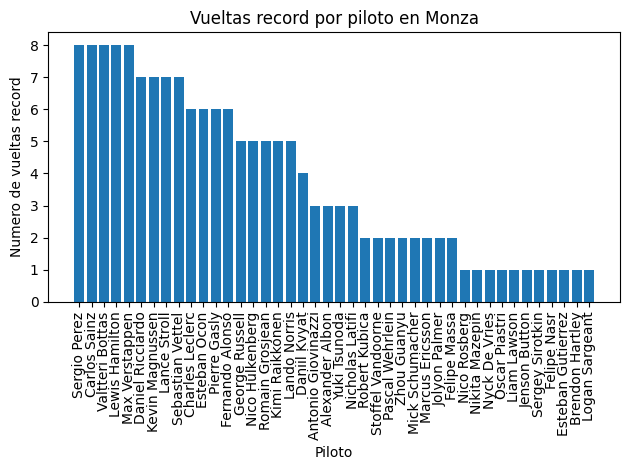

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('monza_gp_clean.csv')

driver_record_counts = df.groupby('Driver')['Time'].count().reset_index(name='Record Count')

driver_record_counts = driver_record_counts.sort_values(by='Record Count', ascending=False)

plt.bar(driver_record_counts['Driver'], driver_record_counts['Record Count'])
plt.xlabel('Piloto')
plt.ylabel('Numero de vueltas record')
plt.title('Vueltas record por piloto en Monza')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


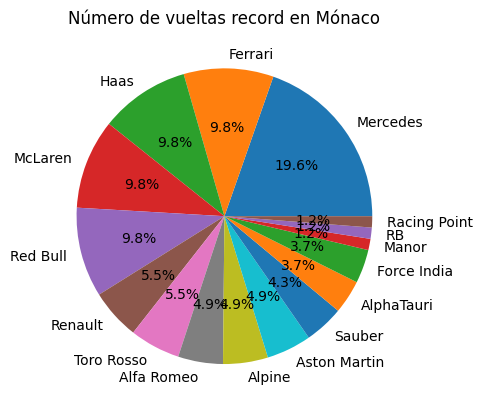

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('monaco_gp_clean.csv')

vehicle_record_counts = df.groupby('Team')['Time'].count().reset_index(name='Record Count')

vehicle_record_counts = vehicle_record_counts.sort_values(by='Record Count', ascending=False)

plt.pie(vehicle_record_counts['Record Count'], labels=vehicle_record_counts['Team'], autopct="%1.1f%%")
plt.title('Número de vueltas record en Mónaco')
plt.show()


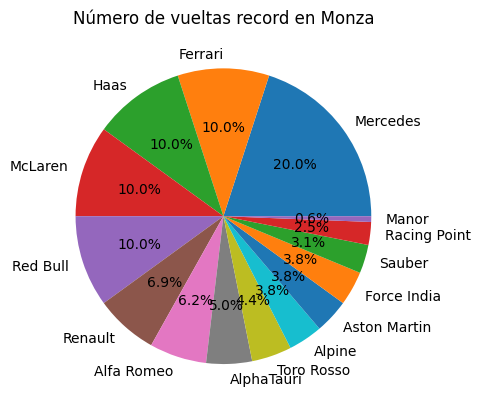

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('monza_gp_clean.csv')

vehicle_record_counts = df.groupby('Team')['Time'].count().reset_index(name='Record Count')

vehicle_record_counts = vehicle_record_counts.sort_values(by='Record Count', ascending=False)

plt.pie(vehicle_record_counts['Record Count'], labels=vehicle_record_counts['Team'], autopct="%1.1f%%")
plt.title('Número de vueltas record en Monza')
plt.show()


Conclusion Teorica: Se nota como ciertas escuderias dominan a lo largo de los años en tiempos de carrera, ya que los porcentajes a pesar de cambiar la pista, se mantienen muy parecidos.

In [68]:
import pandas as pd

def time_to_seconds(time_str):
    minutes, seconds = time_str.split(':')
    return int(minutes) * 60 + float(seconds)

data = pd.read_csv('monaco_gp_clean.csv')

data['Time_seconds'] = data['Time'].apply(time_to_seconds)


fastest_time_seconds = data['Time_seconds'].min()

track_length_km = 3.37  #Longitud circuito Mónaco
average_speed_kph = (track_length_km / (fastest_time_seconds / 3600))

print("La velocidad promedio del circuito de Mónaco es de: " + average_speed_kph.__str__() + " km/h")

La velocidad promedio del circuito de Mónaco es de: 172.89439931594697 km/h


In [67]:
import pandas as pd

def time_to_seconds(time_str):
    minutes, seconds = time_str.split(':')
    return int(minutes) * 60 + float(seconds)

data = pd.read_csv('monza_gp_clean.csv')

data['Time_seconds'] = data['Time'].apply(time_to_seconds)


fastest_time_seconds = data['Time_seconds'].min()

track_length_km = 5.79  #Longitud circuito Monza
average_speed_kph = (track_length_km / (fastest_time_seconds / 3600))

print("La velocidad promedio del circuito de Monza es de: " + average_speed_kph.__str__() + " km/h")

La velocidad promedio del circuito de Monza es de: 264.21599695778934 km/h


Teniendo en cuenta el mejor tiempo de cada circuito, calculamos la velocidad media que tuvo el piloto en esa vuelta. Esto nos permite hacernos una idea de que tan rápida es una pista en particular (Monza es más rápida que Mónaco en este caso).

Considerando lo anterior, calculamos las escuderias con mayor cantidad de mejores vueltas (gráficos de torta de arriba) para ver si estas se desempeñaban mejor que otra en cada circuito (con velocidades muy distintas), pero confirmamos que la dominancia se mantiene a lo largo de la historia con las mismas escuderías sin importar la rapidez de la pista.

Aparte, se ve como a lo largo de los años Mercedes es la escudería que mas records tiene, y los mantiene actualmente como las vueltas mas rapidas en ambos circuitos. De cualquier manera, los records son viejos ya que hubo un cambio de motores y los autos de ahora son mas lentos. Debido a esto, a pesar de que mercedes hoy no sea la escuderia mas rapida, sigue manteniendo ambos records.